In [19]:
# 1. Load the "voice.csv" dataset and perform feature extraction by using "label" as target column
# Load the cars dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

df = pd.read_csv('voice.csv')
#df = df.rename(columns={'label': 'gender'})
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [20]:
df.label = [1 if each=='female' else 0 for each in df.label]
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,0
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,0
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,0
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,0
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,0


In [21]:
y = df.label.values
# Our features for prediction&training, x will include all of data except the outcome(label)
X = df.drop(["label"],axis=1)
X

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,0.011699,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920


In [22]:
#Normalization
X = (X - np.min(X))/(np.max(X)-np.min(X)).values
print(X.head())

   meanfreq        sd    median       Q25       Q75       IQR      skew  \
0  0.096419  0.473409  0.084125  0.060063  0.204956  0.254828  0.367853   
1  0.125828  0.505075  0.116900  0.077635  0.215683  0.246961  0.644279   
2  0.179222  0.675536  0.102873  0.034284  0.385912  0.457148  0.885255   
3  0.528261  0.554611  0.587559  0.389906  0.715802  0.407358  0.031549   
4  0.452195  0.627209  0.454272  0.317627  0.707515  0.474474  0.027742   

       kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0  0.208279  0.635798  0.564526  0.000000  0.096419  0.157706  0.030501   
1  0.483766  0.630964  0.591578  0.000000  0.125828  0.287642  0.031140   
2  0.782275  0.442738  0.548382  0.000000  0.179222  0.236945  0.030264   
3  0.001613  0.923261  0.856457  0.299565  0.528261  0.183442  0.041287   
4  0.001732  0.958736  0.926348  0.372362  0.452195  0.279190  0.036829   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0  0.981526  0.000000  0.006452  0

In [23]:
# Select Train-Test split randomly every-time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
#x_train=x_train.T
#x_test=x_test.T
#y_train=y_train.T
#y_test=y_test.T
model=LogisticRegression()
model.fit(X_train,y_train)

print('Accuracy1 :',model.score(X_train,y_train))
print('Accuracy2 :',model.score(X_test,y_test))

Accuracy1 : 0.9692186266771902
Accuracy2 : 0.9637223974763407


In [24]:
# 4. Check performances by using different number of features. Find the best set of features
df1=df[['meanfreq','sd','median','meanfun','label']]
X = np.array(df1.drop(['label'],1))
y = np.array(df1['label'])
#Normalization
#X = (X - np.min(X))/(np.max(X)-np.min(X)).values
#print(X.head())
# Select Train-Test split randomly every-time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
#x_train=x_train.T
#x_test=x_test.T
#y_train=y_train.T
#y_test=y_test.T
model=LogisticRegression()
model.fit(X_train,y_train)

print('Accuracy3 :',model.score(X_train,y_train))
print('Accuracy4 :',model.score(X_test,y_test))

Accuracy3 : 0.9285714285714286
Accuracy4 : 0.9274447949526814


In [25]:
df1=df[['meanfreq','sd','meanfun','label']]
X = np.array(df1.drop(['label'], 1))
y = np.array(df1['label'])
#Normalization
#X = (X - np.min(X))/(np.max(X)-np.min(X)).values
#print(X.head())
# Select Train-Test split randomly every-time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
#x_train=x_train.T
#x_test=x_test.T
#y_train=y_train.T
#y_test=y_test.T
model=LogisticRegression()
model.fit(X_train,y_train)

print('Accuracy5 :',model.score(X_train,y_train))
print('Accuracy6 :',model.score(X_test,y_test))

Accuracy5 : 0.9419889502762431
Accuracy6 : 0.9337539432176656


In [26]:
df3=df[['meanfun','IQR','Q25','sp.ent','sd','sfm','meanfreq','label']]
X = np.array(df1.drop(['label'], 1))
y = np.array(df1['label'])
#Normalization
#X = (X - np.min(X))/(np.max(X)-np.min(X)).values
#print(X.head())
# Select Train-Test split randomly every-time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
#x_train=x_train.T
#x_test=x_test.T
#y_train=y_train.T
#y_test=y_test.T
model=LogisticRegression()
model.fit(X_train,y_train)

print('Accuracy7 :',model.score(X_train,y_train))
print('Accuracy8 :',model.score(X_test,y_test))

Accuracy7 : 0.9419889502762431
Accuracy8 : 0.9337539432176656


In [27]:
# 5. Build a KNN classifier to detect the label
df = pd.read_csv('voice.csv')
#df = df.rename(columns={'label': 'gender'})
df.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [28]:
df.label = [1 if each=='female' else 0 for each in df.label]
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,0
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,0
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,0
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,0
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,0


In [29]:
X = np.array(df.drop(['label'],axis=1))
y = np.array(df['label'])
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [31]:


# Select Train-Test split randomly every-time
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, neighbors
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
#x_train=x_train.T
#x_test=x_test.T
#y_train=y_train.T
#y_test=y_test.T
#model=LogisticRegression()
model = neighbors.KNeighborsClassifier()
model.fit(X_train,y_train)


print('Accuracy KNN 1 :',model.score(X_train,y_train))
print('Accuracy KNN 2 :',model.score(X_test,y_test))

Accuracy KNN 1 : 0.8038674033149171
Accuracy KNN 2 : 0.7160883280757098


In [32]:
# 6. Find and plot the best value for k
df1=df[['meanfreq','sd','median','meanfun','label']]
X = np.array(df1.drop(['label'],1))
y = np.array(df1['label'])
#Normalization
#X = (X - np.min(X))/(np.max(X)-np.min(X)).values
#print(X.head())
# Select Train-Test split randomly every-time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
#x_train=x_train.T
#x_test=x_test.T
#y_train=y_train.T
#y_test=y_test.T
model = neighbors.KNeighborsClassifier()
model.fit(X_train,y_train)

print('Accuracy3 in KNN :',model.score(X_train,y_train))
print('Accuracy4 :',model.score(X_test,y_test))

Accuracy3 in KNN : 0.9767166535122336
Accuracy4 : 0.9621451104100947


Text(0,0.5,'Accuracy')

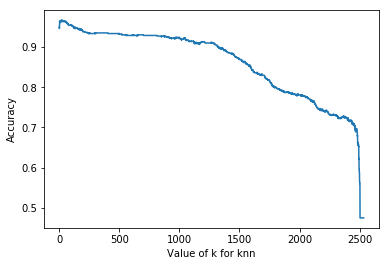

In [33]:
k_range=list(range(1,len(X_train)))
acc_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc_score.append(metrics.accuracy_score(y_test,y_pred))
    
k_values=list(range(1,len(X_train)))
plt.plot(k_values,acc_score)
plt.xlabel('Value of k for knn')
plt.ylabel('Accuracy')